This python notebook is based on the book "Python for Finance: Mastering Data-Driven Finance" by Yves Hilpisch.

Elaborated by: Francisco Arizola

# Part III: Financial Data Science

## Chapter 8: Financial Time Series

### Financial Data

In [1]:
# Import necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Style pyplot with serif font
plt.rcParams['font.family'] = 'serif'

# 3D plotting library
from mpl_toolkits.mplot3d import Axes3D

# Uncomment the next line if you do not have cufflinks and plotly installed
!pip install cufflinks plotly

import pandas as pd
import cufflinks as cf 
import plotly.offline as plyo

# Initialize plotly to work in offline mode
plyo.init_notebook_mode(connected=True)

# Optional: if you are using Jupyter Notebook, you might want to enable inline plotting
cf.go_offline()

In [9]:
# Load data
data = pd.read_csv('../source/tr_eikon_eod_data.csv',
                   index_col=0, # Specifies that the first column shall be handled as an index
                   parse_dates=True) # Specifies that the index values are of type datetime

# See top rows
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [10]:
# Look for any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

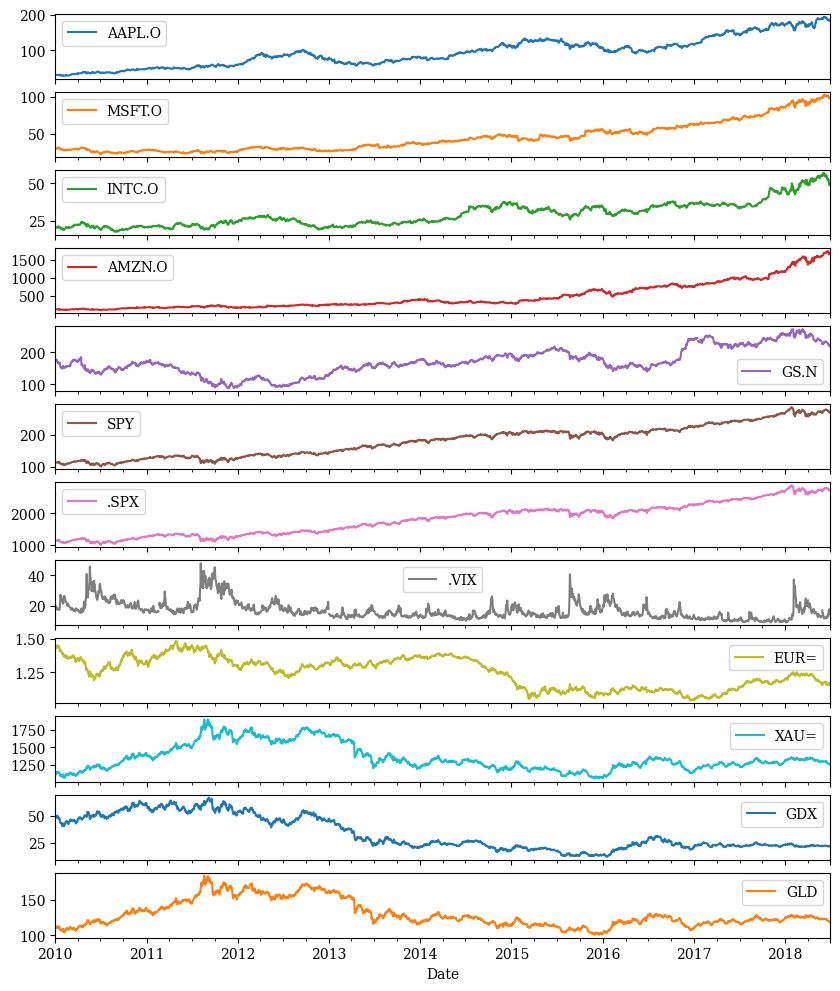

In [11]:
# We take a quick glance at the complete data via multiple subplots
data.plot(figsize=(10, 12), subplots=True)

In [12]:
# Define the instruments that the symbols (sometimes called tickers) represent
instruments = ['Apple Stock', 'Microsoft Stock','Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock', 'SPDR S&P 500 ETF Trust', 
               'S&P 500 Index','VIX Volatility Index', 'EUR/USD Exchange Rate', 'Gold Price', 'VanEck Vectors Gold Miners ETF', 
               'SPDR Gold Trust']

# Visualize the tickers and the instruments
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [13]:
# Describe the general statistics from the data.
data.describe().round(2) # describe() provides useful standard statistics per column

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [14]:
# There are options to customize what types of statistic to derive and display
statistics = data.aggregate([min, np.mean, np.std, np.median, max]).round(2)

display(statistics)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


Changes over time: Statistical analysis methods are often based on changes over time and not the absolute values themselves. There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

In [15]:
# First, the absolute difference
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [16]:
# We can also display the average absolute variation over time
data.diff().mean()

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

In [21]:
# Percentage changes are preffered in the financial context as they do not depend on the time series scale
data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


<Axes: >

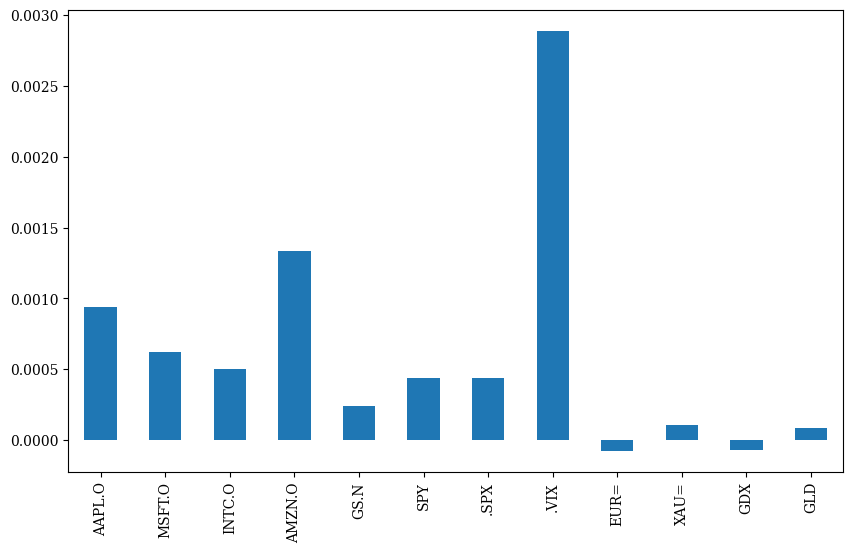

In [20]:
# Plotting the average the return
data.pct_change().mean().plot(kind='bar', figsize=(10, 6))

In some scenarios, log returns are easier to handle and therefore often preferred in a financial context. One major advantage over simple returns is additivity over time:

For log returns, the sum of returns over multiple periods is equal to the return computed over the entire period. If you have log returns for two periods, $r_1$ and $r_2$, the log return for the combined period is $r_1 + r_2$.

Mathematically:

$ r_{1 \rightarrow 3} = \ln\left(\frac{P_3}{P_1}\right) = \ln\left(\frac{P_3}{P_2} \cdot \frac{P_2}{P_1}\right) = \ln\left(\frac{P_3}{P_2}\right) + \ln\left(\frac{P_2}{P_1}\right) = r_2 + r_1 $

This property makes it easier to handle log returns when analyzing cumulative returns over multiple periods.

In [22]:
# We calculate the log returns
rets = np.log(data / data.shift(1))
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


<Axes: xlabel='Date'>

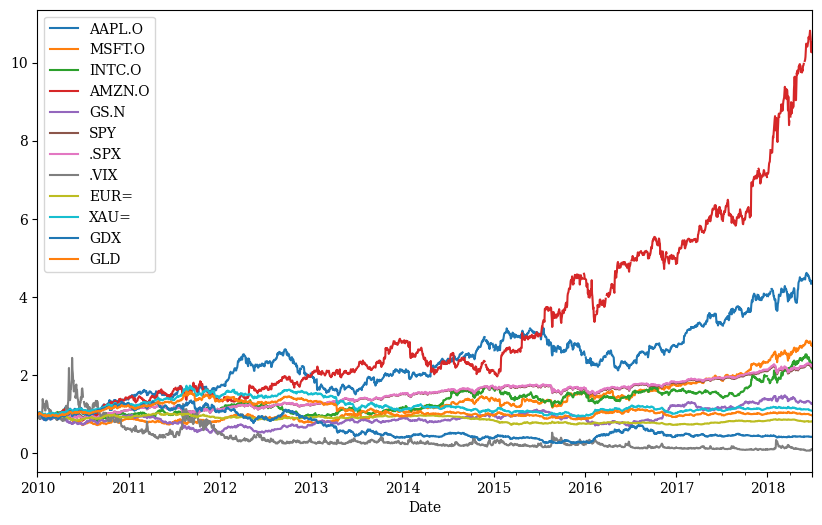

In [23]:
# We plot the aggregated log returns using the cumsum() function and the property of the log returns
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations.

In [24]:
# Resample the data to weekly time intervals
data.resample('1w', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [25]:
# Resample the data to monthly time intervals
data.resample('1m', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


<Axes: xlabel='Date'>

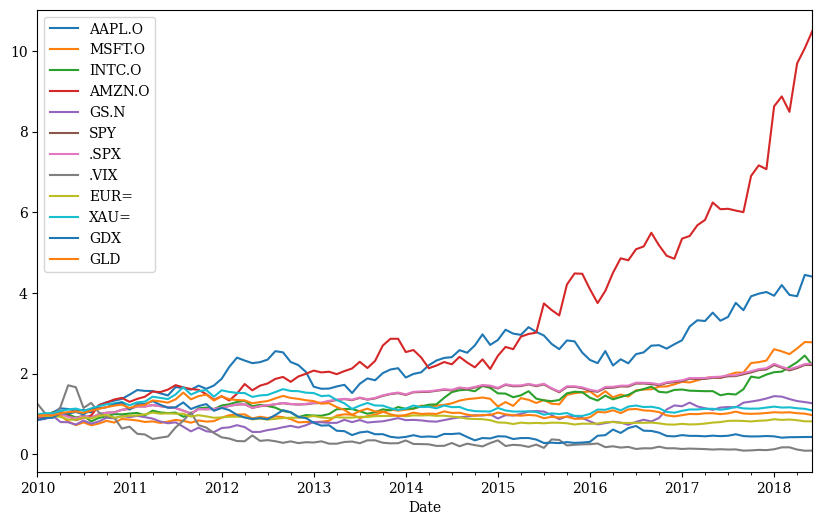

In [28]:
# We plot the cumulative log returns over time
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10, 6))

Note: Make sure to use the "right" label so the resulting monthly data points are labeled with the end of the period. By default, pandas uses the left label (or index value) of the interval to label the resampled data. This means that if you are resampling data from daily to monthly, the resulting monthly data points are labeled with the first day of the month.

If you use the left label, you might inadvertently introduce a foresight bias. This means that your analysis could be misleading because it might look like future data is available at an earlier point in time than it actually was. 

### Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example.

In [30]:
# Let's work with a single financial series
sym = 'AAPL.O'

# Drop missing values
data = pd.DataFrame(data[sym]).dropna()

data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [31]:
# Defines the window; i.e., the number of index values to include.
window = 20

# Calculate the rolling statistics
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()

<Axes: xlabel='Date'>

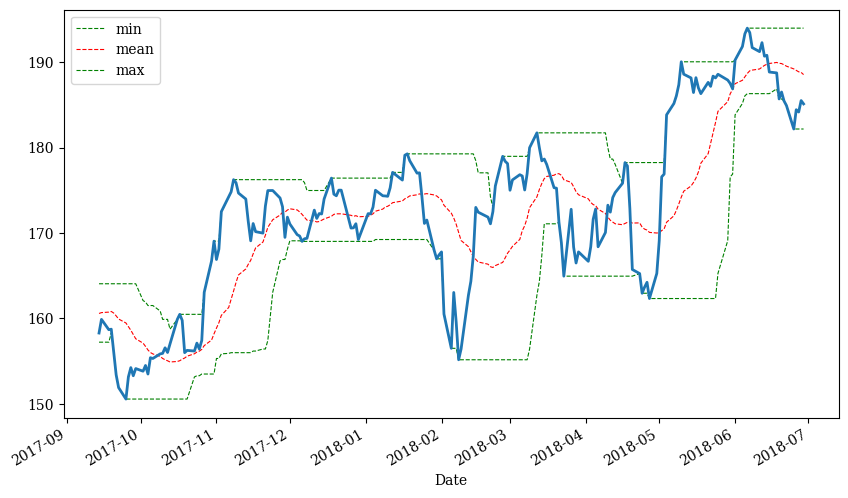

In [37]:
# Plot the original time series with the rolling statistics
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
 figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true.

In [39]:
# Short term SMA
data['SMA1'] = data[sym].rolling(window=42).mean()

# Long term SMA
data['SMA2'] = data[sym].rolling(window=252).mean()

# Display the last rows of the new data frame
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


<Axes: xlabel='Date'>

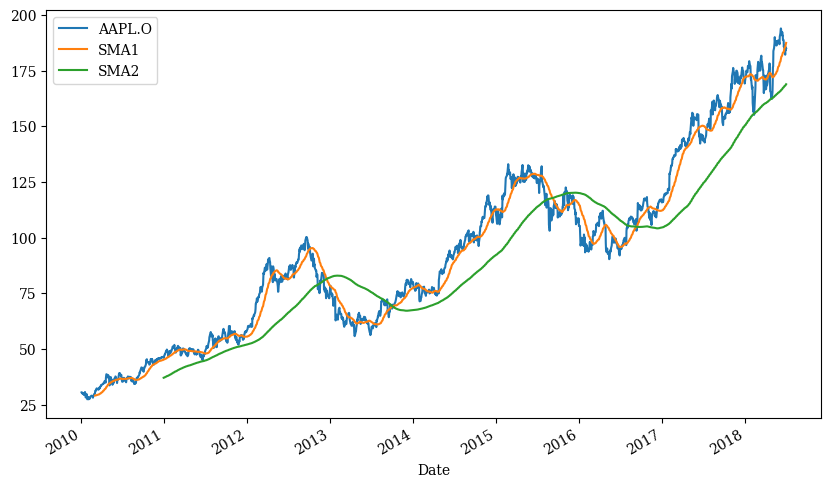

In [40]:
# Plot the time series with the SMAs
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

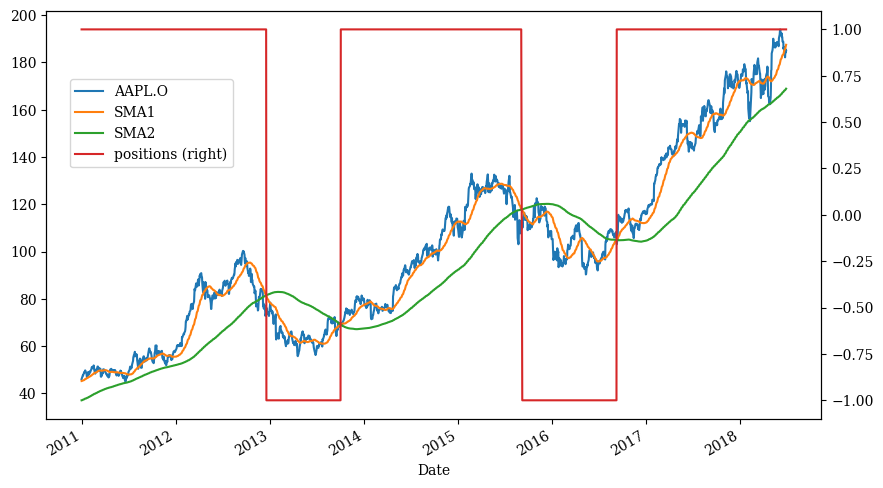

In [41]:
# Drop missing values
data.dropna(inplace=True)

# Add 'long' and 'short' signals
data['positions'] = np.where(data['SMA1'] > data['SMA2'],
 1,
 -1)

# Plot the graph
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
         secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

### Correlation Analysis

This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated.

In [45]:
# Load the data
raw = pd.read_csv('../source/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)

# Keep the relevant columns and drop missing values
data = raw[['.SPX', '.VIX']].dropna()

data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

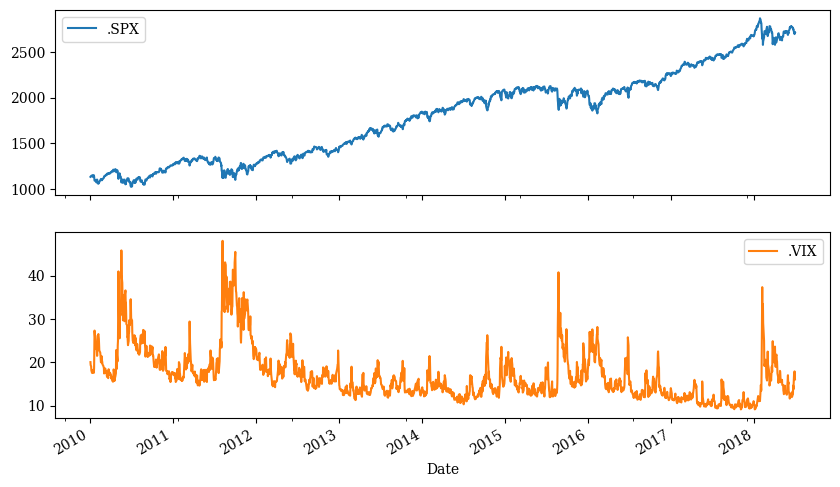

In [46]:
# Plot both time series
data.plot(subplots=True, figsize=(10, 6))

<Axes: xlabel='Date'>

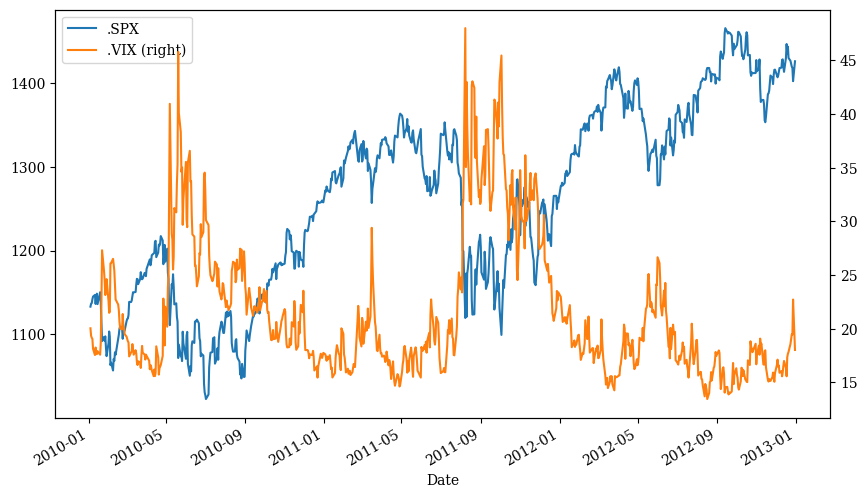

In [48]:
# When plotting the two time series in a single plot and with adjusted scalings, the stylized fact of negative correlation 
# between the two indices becomes evident
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6)) # .loc[:DATE] selects the data until the given value DATE.

In [49]:
# Calculate logarithmic returns
rets = np.log(data / data.shift(1))
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

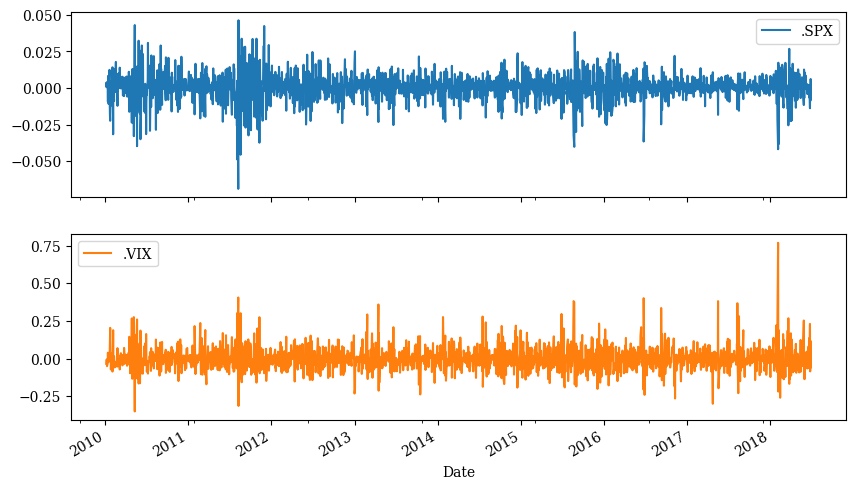

In [51]:
rets.dropna(inplace=True)

rets.plot(subplots=True, figsize=(10, 6))

In such a context, the pandas scatter_matrix() plotting function comes in handy for visualizations. It plots the log returns of the two series against each other, and one can add either a histogram or a kernel density estimator (KDE) on the diagonal.

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

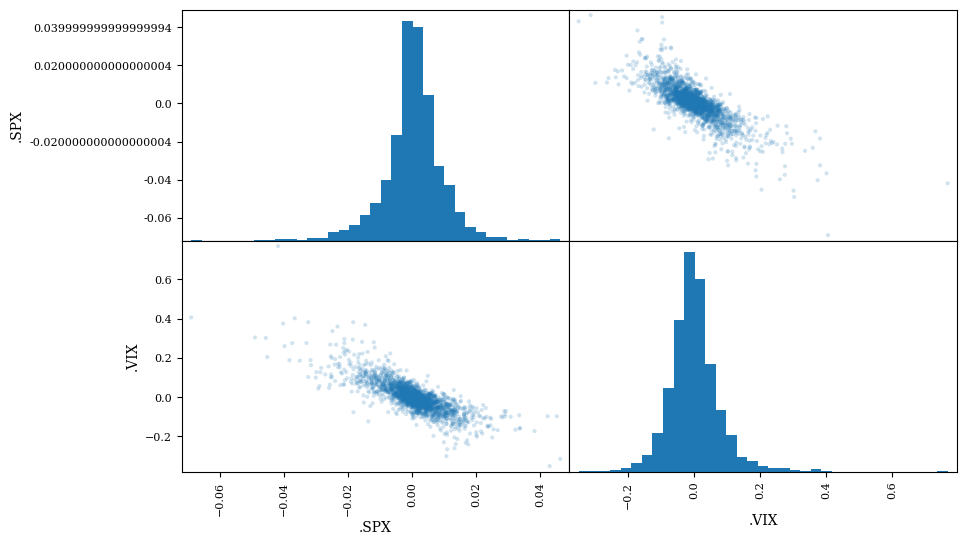

In [52]:
# Plot
pd.plotting.scatter_matrix(rets,
                            alpha=0.2,
                            diagonal='hist',
                            hist_kwds={'bins': 35},
                            figsize=(10, 6))

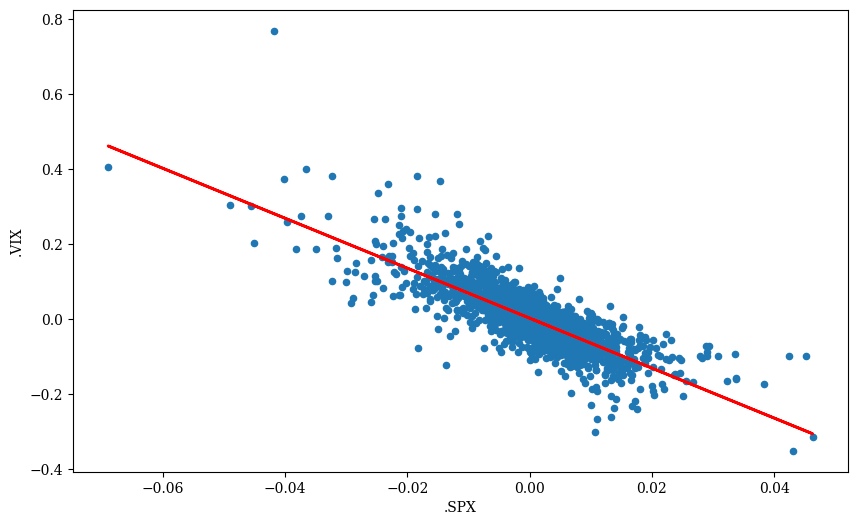

In [53]:
# We run an OLS regression
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)

# We plot the log returns as scatter plot
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))

# We add the linear regression line
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)

In [54]:
# We can directly measure the correlation
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


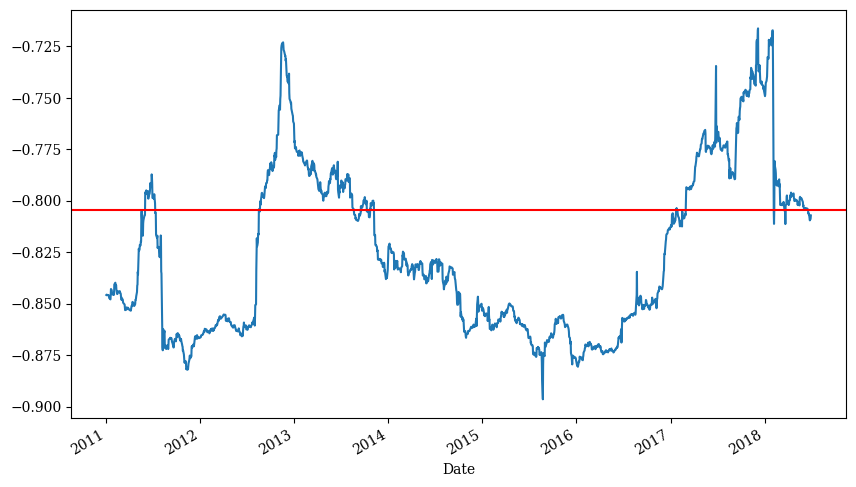

In [56]:
ax = rets['.SPX'].rolling(window=252).corr( 
                    rets['.VIX']).plot(figsize=(10, 6)) # This plots the rolling correlation over time
ax.axhline(rets.corr().iloc[0, 1], c='r') # This adds the static value to the plot as horizontal line

### High Frequency Data

In [61]:
%%time

# We time the loading data process
tick = pd.read_csv('../source/fxcm_eur_usd_tick_data.csv',
index_col=0, parse_dates=True)

CPU times: total: 1.19 s
Wall time: 1.65 s


In [62]:
# See general information from the data frame
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


<Axes: >

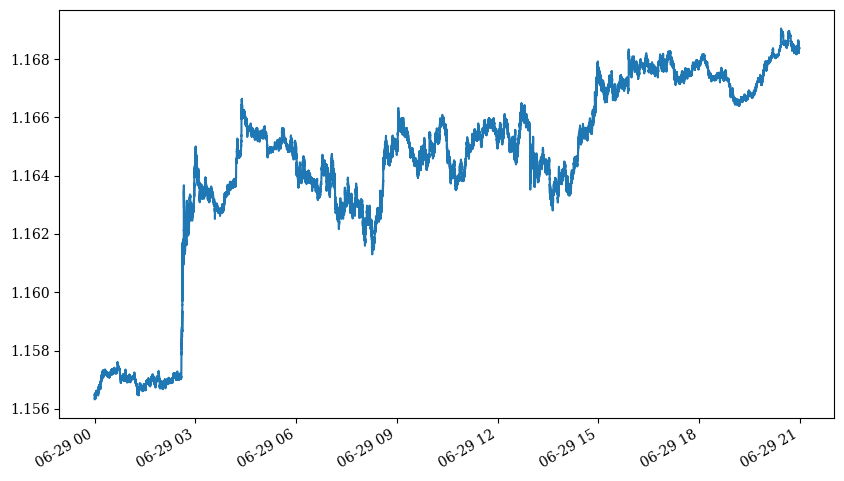

In [63]:
# Calculate the mid price for every data row
tick['Mid'] = tick.mean(axis=1)

# Plot the mid price time series
tick['Mid'].plot(figsize=(10, 6))

In [64]:
# Resample the tick data to five-minute bar data
tick_resam = tick.resample(rule='5min', label='right').last()

# See first few rows
tick_resam.head()

,Bid,Ask,Mid
2018-06-29 00:05:00,1.15649,1.15651,1.156500
2018-06-29 00:10:00,1.15671,1.15672,1.156715
2018-06-29 00:15:00,1.15725,1.15727,1.157260
2018-06-29 00:20:00,1.15720,1.15722,1.157210
2018-06-29 00:25:00,1.15711,1.15712,1.157115


<Axes: >

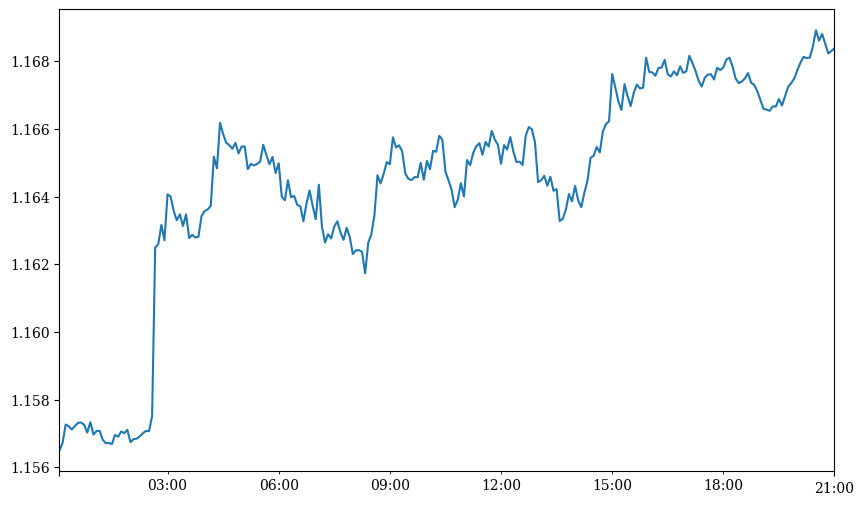

In [66]:
# Plot the five-minute time series
tick_resam['Mid'].plot(figsize=(10, 6))